# isaura beersheba track comparison

#### low pressure data

In [18]:
import sys,os,os.path
sys.path.append("../")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

#%load_ext autoreload
#%autoreload 2
#%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

import pandas as pd
import numpy  as np
import tables as tb

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import IC.invisible_cities.core.core_functions                   as     coref
import IC.invisible_cities.io.dst_io                           as     dstio

from IC.invisible_cities.cities                 import beersheba as beerfun


from IC.invisible_cities.database.load_db       import DataSiPM

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.evm.event_model        import HitEnergy
from IC.invisible_cities.cities.beersheba          import DeconvolutionMode
from IC.invisible_cities.cities.beersheba          import CutType


from IC.invisible_cities.reco.deconv_functions import deconvolve
from IC.invisible_cities.reco.deconv_functions import deconvolution_input
from IC.invisible_cities.reco.deconv_functions import InterpolationMethod

import IC.invisible_cities.io.mcinfo_io as mcio


import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [20]:
### COLLECT BEERSHEBA PLOTS
LP_file = f'HPR/208Tl/PORT_1a/prod/beersheba/beersheba_92_208Tl.h5'

# load in events from deco
hdst = dstio.load_dst(LP_file, 'DECO', 'Events')
print(hdst.event.nunique())
print(hdst.event.unique()[:10])

1889
[3640000 3640002 3640004 3640006 3640008 3640010 3640012 3640014 3640016
 3640020]


In [21]:
# add isaura equivalent
LP_file_isaura = f'HPR/208Tl/PORT_1a/prod/isaura/isaura/isaura_92_208Tl.h5'

hdst_isaura = dstio.load_dst(LP_file_isaura, 'Tracking', 'Tracks')

In [71]:
# choose an event :) but make sure it exists! do it via index
evt_number = 3640358

In [72]:
display(hdst_isaura)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,3640000,0,1.480744,65.392569,57,5870,5,340.675,181.675,746.354370,...,748.279557,346.753742,202.138122,788.088422,0.679631,0.500773,0.000000,9.950000,9.771429,4.965115
1,3640000,1,0.423784,16.085136,8,1341,5,231.675,28.675,764.811584,...,768.063672,242.524047,39.264105,775.201740,0.423784,0.423784,0.423784,9.950000,9.771429,4.965115
2,3640000,2,0.313133,16.085136,7,1752,5,-228.325,-119.325,847.155945,...,848.035606,-216.371257,-107.609197,855.837412,0.313133,0.313133,0.313133,9.950000,9.771429,4.965115
3,3640000,3,0.199030,47.791455,16,1481,5,50.675,-14.325,297.810089,...,300.893105,52.554627,-8.552420,301.166500,0.185314,0.013716,0.000000,9.950000,9.771429,4.965115
4,3640000,4,0.142726,14.803232,5,895,5,160.675,-61.325,697.617798,...,701.323922,171.895673,-48.120362,698.325241,0.142726,0.142726,0.142726,9.950000,9.771429,4.965115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4345,3643830,3,0.000332,9.791667,2,12,4,259.675,147.675,218.812332,...,218.812332,261.675000,150.675000,218.812332,0.000332,0.000332,0.000332,9.444444,9.791667,4.929910
4346,3643832,0,0.535097,19.314152,14,2591,1,212.675,40.675,969.786926,...,982.600593,225.090420,45.960703,975.132756,0.530408,0.529934,0.525246,7.750000,8.800000,3.977325
4347,3643834,0,0.215578,19.616936,9,1584,3,341.675,322.675,496.887665,...,506.770657,353.751819,327.150806,498.323185,0.215578,0.215578,0.215578,9.978261,9.600000,4.921729
4348,3643834,1,0.137721,10.788115,3,848,3,61.675,252.675,643.866638,...,646.054925,64.320637,264.285759,649.291502,0.137721,0.137721,0.137721,9.978261,9.600000,4.921729


In [73]:
display(hdst)

,event,npeak,X,Y,Z,E
0,3640000,0.0,82.675,6.675,297.810089,0.000020
1,3640000,0.0,82.675,7.675,297.810089,0.000031
2,3640000,0.0,82.675,8.675,297.810089,0.000028
3,3640000,0.0,82.675,9.675,297.810089,0.000014
4,3640000,0.0,83.675,5.675,297.810089,0.000030
...,...,...,...,...,...,...
10015825,3643834,1.0,72.675,259.675,652.222046,0.000009
10015826,3643834,1.0,73.675,255.675,652.222046,0.000010
10015827,3643834,1.0,73.675,256.675,652.222046,0.000014
10015828,3643834,1.0,73.675,257.675,652.222046,0.000012


In [74]:
hdst_example = hdst_isaura[hdst_isaura.event == 1820000]
#display(hdst_example)
#display(hdst_example.loc[0].numb_of_tracks)
#display(hdst_example.numb_of_tracks == 1)
#display(hdst_example.numb_of_tracks[0])
display(hdst_isaura.event.unique())

array([3640000, 3640002, 3640004, ..., 3643830, 3643832, 3643834],
      dtype=int32)

In [75]:
# This only takes events with a total energy larger than the minimum within our ROI
# 1.5 - 1.7 MeV
i = 0
j = 0
e_sum_list = []

for evt in hdst.event.unique():
    hits_df_evt = hdst[hdst.event == evt]
    if((hits_df_evt.E.sum() > 1.5) and (hits_df_evt.E.sum() < 1.7)):
        print(evt,hits_df_evt.E.sum() )
        e_sum_list.append(evt)
        i += 1

print("{} number of events with E between 1.5 and 1.7 MeV\n".format(i))

print("One tracks")

for evt in hdst_isaura.event.unique():
    isaura_df_evt = hdst_isaura[hdst_isaura.event == evt]
    #print(type(hdst_isaura.numb_of_tracks[0]))
    if (hdst_isaura.numb_of_tracks[0] == np.int64(1)):
        print(evt)
        j +=1
print("{} number of events with 1 track".format(j))

3640114 1.6986750488396192
3640156 1.633121951961018
3640194 1.6614859370835153
3640268 1.6477724319510685
3640358 1.6857263424160913
3640374 1.5081786183771262
3640390 1.5774513896651539
3640420 1.5954633723521783
3640480 1.6151920962107016
3640490 1.6076446877756954
3640558 1.6430169957165788
3640568 1.687984695088936
3640772 1.513069512781218
3640806 1.5509198935486999
3640900 1.5968994864289807
3640912 1.5947150226640348
3640996 1.587475016742158
3641008 1.5457393919583402
3641158 1.5247658012330203
3641194 1.6594988461692481
3641222 1.6036851956959293
3641268 1.5149211286141206
3641314 1.508255359412244
3641328 1.6576521094489076
3641342 1.5875816832291405
3641344 1.541224427882574
3641374 1.652452446451933
3641418 1.5222965849052736
3641450 1.6222969128071303
3641492 1.6846454636656456
3641552 1.6251408243928986
3641636 1.6168953745178989
3641642 1.6112270166985703
3641646 1.589699554692599
3641814 1.5764404940681271
3641884 1.5918604297071153
3641892 1.5769971181131328
3642030 1

In [76]:
# load in MC tracks

evtmap = mcio.load_eventnumbermap(LP_file).set_index('nexus_evt')
true_info = mcio.load_mchits_df(LP_file).reset_index()
true_info.event_id = true_info.event_id.map(evtmap.evt_number)

display(evtmap)
display(true_info)
display(true_info.loc[true_info['event_id'] == evt_number])

,evt_number
nexus_evt,
1820000,3640000
1820001,3640002
1820002,3640004
1820003,3640006
1820004,3640008
...,...
1821913,3643826
1821914,3643828
1821915,3643830


,event_id,particle_id,hit_id,x,y,z,time,energy,label
0,3640000,44,0,250.933334,42.542850,765.413940,1.501893,0.000071,ACTIVE
1,3640000,50,0,250.933334,42.542858,765.413940,1.501900,0.000021,ACTIVE
2,3640000,49,0,250.933334,42.542866,765.413879,1.501901,0.000047,ACTIVE
3,3640000,48,0,250.933273,42.542801,765.413940,1.501899,0.000028,ACTIVE
4,3640000,48,1,250.933136,42.542679,765.413879,1.501913,0.000525,ACTIVE
...,...,...,...,...,...,...,...,...,...
349087,3643834,60,23,-89.364174,273.819214,477.994110,3.230267,0.001150,ACTIVE
349088,3643834,60,24,-89.368530,273.817535,477.988556,3.230401,0.001554,ACTIVE
349089,3643834,60,25,-89.367165,273.813324,477.985596,3.230511,0.002672,ACTIVE
349090,3643834,60,26,-89.366127,273.811310,477.984344,3.230578,0.002332,ACTIVE


,event_id,particle_id,hit_id,x,y,z,time,energy,label
32286,3640358,23,0,449.806793,-122.159966,100.672958,2.269464,0.000059,ACTIVE
32287,3640358,28,0,449.806793,-122.159966,100.672951,2.269467,0.000033,ACTIVE
32288,3640358,27,0,449.806793,-122.159966,100.673027,2.269482,0.000045,ACTIVE
32289,3640358,26,0,449.806793,-122.159966,100.672958,2.269465,0.000010,ACTIVE
32290,3640358,25,0,448.089935,-110.973953,100.467239,2.307220,0.000266,ACTIVE
...,...,...,...,...,...,...,...,...,...
32670,3640358,50,0,466.812103,-155.995987,156.414185,2.677381,0.000130,ACTIVE
32671,3640358,50,1,466.812134,-155.997238,156.416031,2.677442,0.003793,ACTIVE
32672,3640358,48,0,466.813538,-155.993652,156.413055,2.677407,0.000058,ACTIVE
32673,3640358,48,1,466.818451,-155.991928,156.413788,2.677515,0.004375,ACTIVE


In [77]:

this_evt_true_info = true_info[true_info.event_id == evt_number]

xt = this_evt_true_info.x
yt = this_evt_true_info.y
zt = this_evt_true_info.z
et = this_evt_true_info.energy*1000

In [78]:
this_evt_df = hdst[hdst.event == evt_number]

display(this_evt_df)

x = this_evt_df.X
y = this_evt_df.Y
z = this_evt_df.Z
e = this_evt_df.E*1000

print(x)
print(x.max(), x.min())

,event,npeak,X,Y,Z,E
930762,3640358,0.0,457.675,-147.325,83.637070,0.000171
930763,3640358,0.0,458.675,-148.325,83.637070,0.000227
930764,3640358,0.0,458.675,-147.325,83.637070,0.000260
930765,3640358,0.0,458.675,-146.325,83.637070,0.000156
930766,3640358,0.0,459.675,-148.325,83.637070,0.000181
...,...,...,...,...,...,...
936987,3640358,0.0,428.675,-132.325,188.519180,0.000250
936988,3640358,0.0,428.675,-131.325,188.519180,0.000218
936989,3640358,0.0,427.675,-132.325,189.355133,0.000198
936990,3640358,0.0,427.675,-131.325,189.355133,0.000173


930762    457.675
930763    458.675
930764    458.675
930765    458.675
930766    459.675
           ...   
936987    428.675
936988    428.675
936989    427.675
936990    427.675
936991    428.675
Name: X, Length: 6230, dtype: float64
473.675 407.675


In [79]:

this_evt_df = hdst[hdst.event == evt_number]

    
x = this_evt_df.X
y = this_evt_df.Y
z = this_evt_df.Z
e = this_evt_df.E*1000

#print(x)
x_range = (x.max()-x.min())/2.
y_range = (y.max()-y.min())/2.
z_range = (z.max()-z.min())/2.
mid_x   = (x.max()+x.min())/2.
mid_y   = (y.max()+y.min())/2.
mid_z   = (z.max()+z.min())/2.

xbins = int(x.max()-x.min())
ybins = int(y.max()-y.min())
zbins = int((z.max()-z.min())/2.)

print(z.max())

189.35513305664062


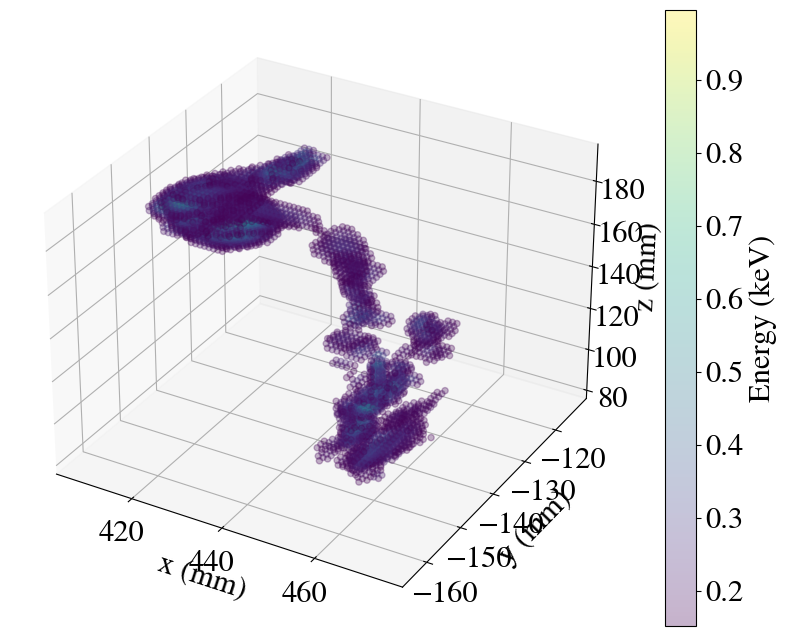

Event 3640358 
Energy: 1.6857


In [80]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(x, y, z, c=e, alpha=0.3, cmap='viridis')
cb = fig.colorbar(p, ax=ax)
cb.set_label('Energy (keV)')

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')

plt.show()
hits_df_evt = hdst[hdst.event == evt_number]
print('Event {} \nEnergy: {:.4f}'.format(evt_number, hits_df_evt.E.sum()))

In [81]:
# extract the relevant isaura blob positions
display(hdst_isaura.loc[hdst_isaura['event'] == evt_number])
# take blob x,y,z for 1 and 2 here and plot them with circles

#blob1_x = 

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
398,3640358,0,1.325293,69.649964,58,4643,2,407.675,-160.325,155.856659,...,186.436297,462.676748,-156.278990,159.557820,0.324598,0.076502,0.0,9.428571,10.0,4.805367
399,3640358,1,0.360434,64.097455,39,1495,2,444.675,-157.325,83.637070,...,86.697109,460.186306,-147.812431,134.763256,0.144902,0.083851,0.0,9.428571,10.0,4.805367


Text(0, 0.5, 'z (mm)')

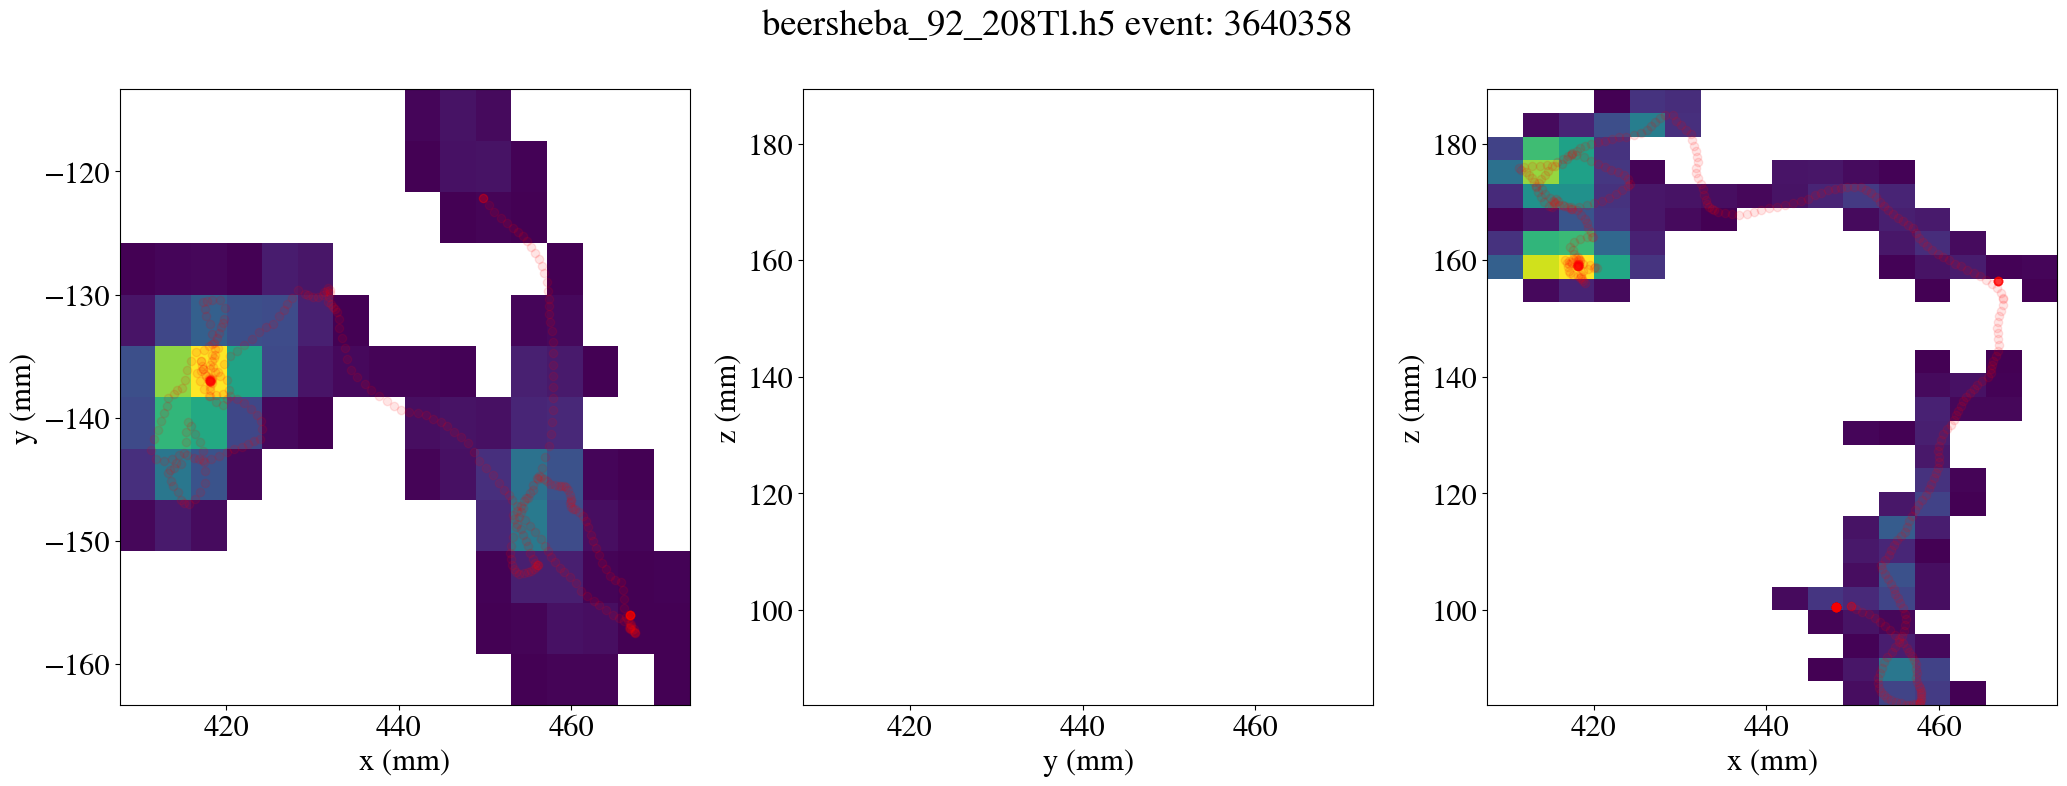

In [82]:
# plot x,y,z
plot_title = "beersheba_92_208Tl.h5 event: " + str(evt_number)
fig, ((ax1), (ax2), (ax3)) = plt.subplots(1, 3, sharex=True, figsize=(25, 8))
fig.suptitle(plot_title)


ax1.hist2d(x, y, weights=e, bins=(int(x_range/2), int(y_range/2)),
               range=((mid_x - x_range, mid_x + x_range), (mid_y - y_range, mid_y + y_range)),
               cmin=0.0001)
# MC
ax1.scatter(xt, yt, color='red', alpha = 0.1)

ax1.set_xlabel('x (mm)')
ax1.set_ylabel('y (mm)')

ax2.hist2d(y, z, weights=e, bins=(int(y_range/2), int(z_range/2)),
               range=((mid_y - y_range, mid_y + y_range), (mid_z - z_range, mid_z + z_range)),
               cmin=0.0001)

# MC
ax2.scatter(yt, zt, color='red', alpha = 0.1)

ax2.set_xlabel('y (mm)')
ax2.set_ylabel('z (mm)')

ax3.hist2d(x, z, weights=e,  bins=(int(x_range/2), int(z_range/2)),
               range=((mid_x - x_range, mid_x + x_range), (mid_z - z_range, mid_z + z_range)),
               cmin=0.0001)

# MC
ax3.scatter(xt, zt, color='red', alpha = 0.1)

ax3.set_xlabel('x (mm)')
ax3.set_ylabel('z (mm)')

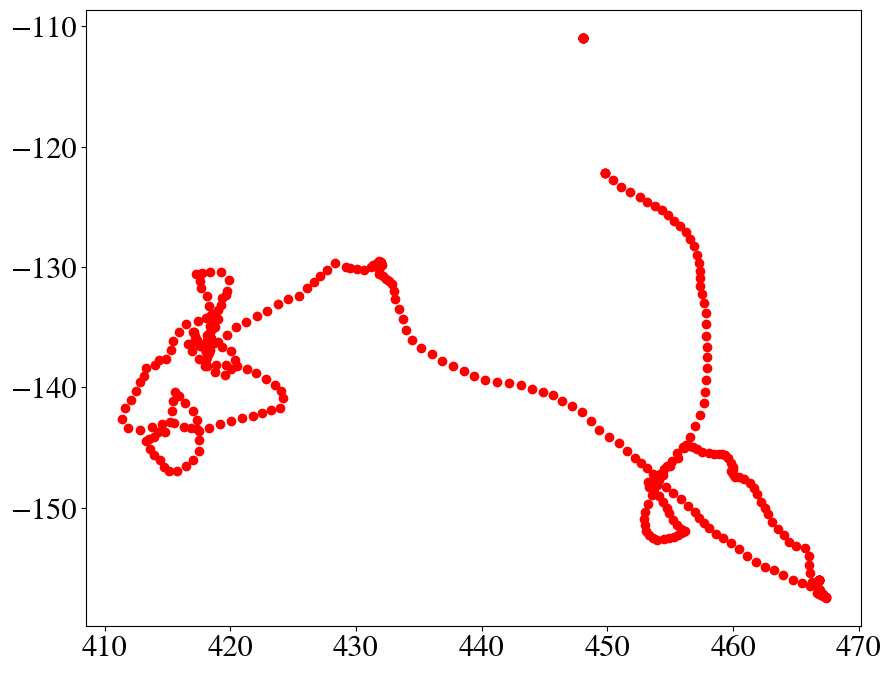

In [83]:
plt.scatter(xt,yt, color='red')